# Data analysis - Introduction for Gamma Spectroscopy

## Table of Content

* [About this Notebook](#about)


* [Read experimental data from file](#read)
    * [HelpCode](#help1)
    * [Read the calibrated background spectrum](#backg)
    * [Plotting the data](#plot)


* [Fit of data](#fit)
    * [Fitting Gaussians](#gaussian)
    * [Fit a line](#line)


* [Statistical analysis](#stat)

## About this Notebook <a name="about"></a>

The purpose of this _jupyter_ notebook is to introduce data analysis in the
frame of gamma spectroscopy. The example programming language is _Python3_, but
of course most coding languages can do the job properly. If you have never
programmed before there are so many great tutorials available across the web.
There even exist plenty _Open Online Courses_, e.g.
https://www.coursera.org/learn/python. Please have a look around for the one
that you like the best. However, note that you do not need to be an expert in
Python to pass the lab.

The data analysis can roughly be divided into four steps:
1. Read experimental data from file.
2. Fit Gaussians to peaks.
3. Calibrate the detector response.
4. Perform a statistical analysis (e.g. error propagation) and present results.

A dedicated python library, i.e. a folder with already written code, located in
`HelpCode`, have been implemented for the data analysis connected to the labs in
FYSC12 Nuclear Physics. The folder comprises functions that support 1-3 of the
above-mentioned steps.

Full Python3 coding examples of how to perform the different steps of the data
analysis is given below. Every example is finished with a template of how the
`HelpCode`-folder can be used to perform the same calculations.

**NOTE**: It is strongly recommended that you program your own functions instead
of using the framework directly out of the book. As you will find out, there
will come a point where the framework functionalities are not to your
satisfaction, and then you need to code yourself. So, better get used to it
right away :)

## Read experimental data from file <a name="read"></a>

The following code segment exemplifies how to read in an experimental data file
into a list container. For an introduction on how to read and write files see
e.g. http://www.pythonforbeginners.com/files/reading-and-writing-files-in-
python.

In [1]:
array_of_data = list()
read_lines = 0
total_data = 0
start_read = False
with open("test_data.Spe") as file:
    for j, line in enumerate(file):
        #if j < 100:
            #print(line.split())
        if line.split()[0] == '$DATA:':
            #print(line.split())
            start_read = True
        elif start_read and read_lines == 0:
            #print(line.split())
            total_data = int(line.split()[1])+1
            #print(total_data)
            read_lines = read_lines + 1
            continue
        elif start_read and line.split()[0] != '$ROI:':
            #print(line.split())
            array_of_data.append(int(line.split()[0]))
        elif start_read:
            break
        
print("Should read:", total_data, "lines. And read:", len(array_of_data))
        

Should read: 8192 lines. And read: 8192


### `HelpCode` <a name="help1"></a>

With the `help_code` it is possible to perform conceptually the same operations
through:

In [2]:
from HelpCode.MCA import *
data = load_spectrum("test_data.Spe")

### Read the calibrated background spectrum <a name="backg"></a>

The background spectrum that is to be analysed as a part of the lab is named
`background_analysis.csv` and can be found in the current folder. This spectrum
has been measured with another detector and is already calibrated. Read this
spectrum with the `help_code` with:

In [3]:
background_data = load_calibrated_spectrum("Background.txt")

### Plotting the data <a name="plot"></a>

It is always good to visualise your data. This is how you can plot and visualise
it in Python3.

In [4]:
import matplotlib
# choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg')
# enable interactive notebook plots (
# alternative: use 'inline' instead of 'notebook' for static images)
%matplotlib notebook

#The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt
#from bqplot import pyplot as plt

<IPython.core.display.Javascript object>


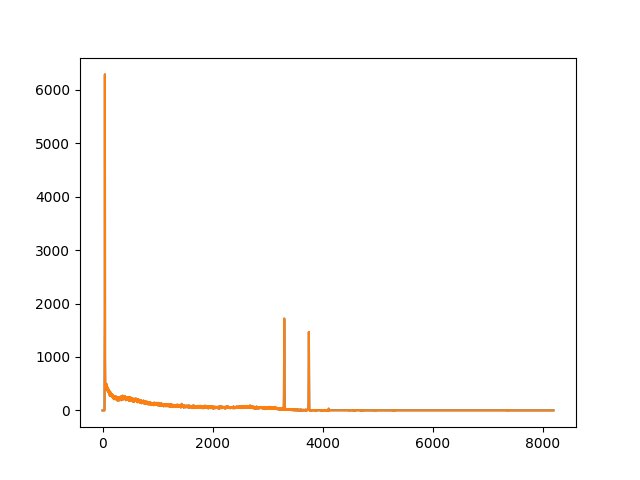

In [5]:
plt.figure()
# with the data read in with the first routine
plt.plot(array_of_data)
# or with the help_code variable "data"
#plt.plot(background_data.x, background_data.y)

#plt.savefig("test_spectrum.png") #This is how you save the figure
#plt.show()
axis = plt.gca()
axis.plot(array_of_data)

## Could be useful to see this in log scale..?
#plt.yscale('log')
#plt.ylim(ymin=1)

## Fit of data <a name="fit"></a>

Fitting functions can be made simply with the `scipy.optimize` module. The
function `curve_fit` does the job for you and the [documentation](https://docs.s
cipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) contains
all the valuable information on how to use the function. It uses a method called
least squares which you can read about in most course literature on statistics
and for instance on [Wolfram
Alpha](http://mathworld.wolfram.com/LeastSquaresFitting.html).

### Fitting Gaussian <a name="gaussian"></a>

The following code shows how to use the function `curve_fit` to fit a peak in
the data that was read in above (i.e. you will need to execute the above code
section before this section will work).

Estimates of (A mu sigma) = ( 1701.43796992 3300.1739634 2.69078263554 )

Covariance matrix = 
 [[  2.22927047e+02   4.29594398e-06  -2.35037636e-01]
 [  4.29594398e-06   7.43418433e-04  -6.79408923e-09]
 [ -2.35037636e-01  -6.79408923e-09   7.43418426e-04]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 222.927046993 0.000743418433343 0.00074341842635 ]


<IPython.core.display.Javascript object>


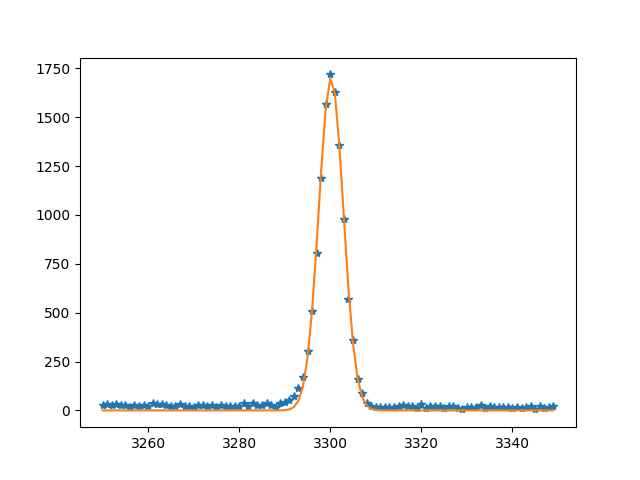

In [6]:
from scipy.optimize import curve_fit

def GaussFunc(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

#mu = np.asarray([3300, 3750])
#E = np.asarray([1173.2, 1332.5])
mu = 3300
A = array_of_data[mu]
sigma = 1
guess = [A, mu, sigma]
n = 50 #number of points on each side to include in fit

x = np.asarray(range(len(array_of_data)))
y = np.asarray(array_of_data)

estimates, covar_matrix = curve_fit(GaussFunc,
                                    x[mu-n:mu+n],
                                    y[mu-n:mu+n],
                                    p0=guess)

print("Estimates of (A mu sigma) = (", estimates[0], estimates[1], estimates[2], ")\n")

print("Covariance matrix = \n", covar_matrix, "\n")

print("Uncertainties in the estimated parameters: \n[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = \n[", covar_matrix[0][0], covar_matrix[1][1], covar_matrix[2][2], "]" )

plt.figure()
plt.plot(x[mu-n:mu+n],y[mu-n:mu+n], linestyle="", marker="*")
plt.plot(x[mu-n:mu+n], GaussFunc(x[mu-n:mu+n], estimates[0], estimates[1], estimates[2]))


### HelpCode

With the `HelpCode`:

Estimates of (A mu sigma) = ( 1701.43796992 3300.1739634 2.69078263554 )

Covariance matrix = 
 [[  2.22927047e+02   4.29594398e-06  -2.35037636e-01]
 [  4.29594398e-06   7.43418433e-04  -6.79408923e-09]
 [ -2.35037636e-01  -6.79408923e-09   7.43418426e-04]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 222.927046993 0.000743418433343 0.00074341842635 ]


<IPython.core.display.Javascript object>


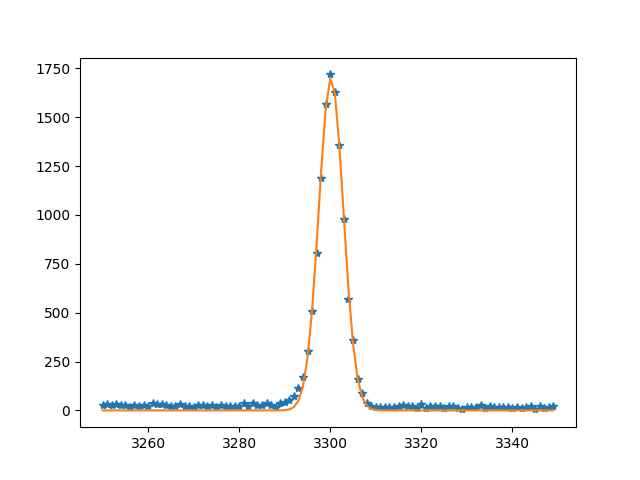

In [7]:
from HelpCode.fithelpers import *

gauss = fit_gaussian_at_idx(x, y, mu, npoints=n)
print("Estimates of (A mu sigma) = (", gauss.A, gauss.mu, gauss.sigma, ")\n")

print("Covariance matrix = \n", gauss.covar_matrix, "\n")

print("Uncertainties in the estimated parameters: \n[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = \n[", gauss.covar_matrix[0][0], gauss.covar_matrix[1][1], gauss.covar_matrix[2][2], "]" )

plt.figure()
plt.plot(data.x[mu-n:mu+n], data.y[mu-n:mu+n], linestyle="", marker="*")
plt.plot(data.x[mu-n:mu+n], gauss.value(data.x)[mu-n:mu+n])

### Fit a line <a name="line"></a>

Estimates of (k m) = ( 0.515443427647 0.402293563481 )



<IPython.core.display.Javascript object>


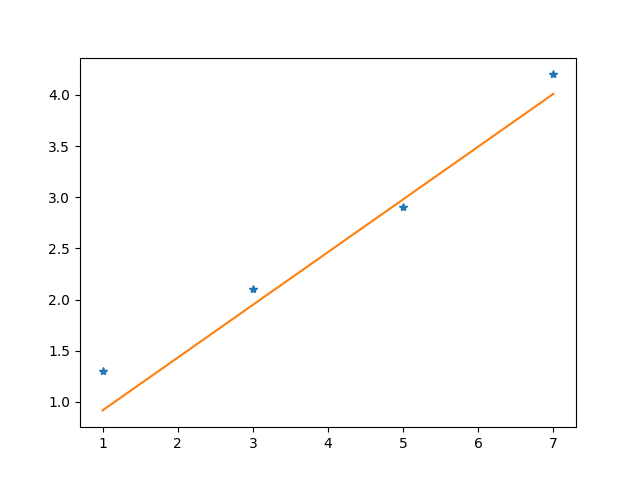

In [8]:
x = np.asarray([1,3,5,7])
y = np.asarray([1.3, 2.1, 2.9, 4.2])
#If you are more or less uncertain about your y-values this can be used in the fit by including the following line.
sigmay = np.asarray([0.5, 0.3, 0.1, 0.2])

guess = [2, 1]

def LineFunc(x, k, m):
    return k*x+m

estimates, covar_matrix = curve_fit(LineFunc,
                                    x,
                                    y,
                                    p0 = guess,
                                    sigma = sigmay)

print("Estimates of (k m) = (", estimates[0], estimates[1], ")\n")

plt.figure()
plt.plot(x,y, linestyle="", marker="*")
plt.plot(x, LineFunc(x, estimates[0], estimates[1]))


## Statistical analysis <a name="stat"></a>

Background theory and instructions on how to perform statistical analysis on
experimental data, with error propagation, can be found in the document
`error_analysis.pdf`), but of course also easily through a google search.